In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import utils
DATASET_PATH='../dataset/races.csv'

"""                      dtype={
                         '_url':'str',
                         'name':'str',
                         'points':'Int64',
                         'uci_points':'Int64',
                         'length':'Int64',
                         'climb_total':'Int64',
                         'profile':'str',
                         'starlist_quality':'Int64',
                         'average_temperature':'float64',
                         'position':'Int64',
                         'cyclist':'str',
                         'cyclist_age':'Int64',
                         'is_tarmac':'bool',
                         'is_cobbled':'bool',
                         'is_gravel':'bool',
                         'cyclist_team':'str'
                     }, """
races_df=pd.read_csv(DATASET_PATH,
                     parse_dates=['date']
                     )

# Cyclists data quality analysis

This notebook takes care of the data quality assessment for the cyclists data.

A first dumb check evidences no duplicate rows (at least across all features).

In [25]:
len(races_df[races_df.duplicated()])

0

A first preliminary analysis we can show how many values are currently missing from the dataset.

In [125]:
mv_df=pd.DataFrame(races_df.isnull().sum())
mv_df=mv_df.rename(columns={0:'missing values'})
mv_df['missing values']=mv_df['missing values'].astype('int')
mv_df['missing values %']=((mv_df['missing values']/len(races_df))*100).round(3)

mv_df.sort_values('missing values',ascending=False)

,missing values,missing values %
average_temperature,559932,94.925
uci_points,338779,57.433
cyclist_team,159161,26.983
profile,148194,25.123
climb_total,147045,24.929
points,477,0.081
cyclist_age,113,0.019
_url,0,0.000
is_gravel,0,0.000
is_cobbled,0,0.000


The most missing features are the average temperature with almost all values missing, uci_points has more than half of it values missing and we also have the cyclist_team,profile and climb_total have around 25% of their values missing.
For all the other attributes the missing values are very few or none at all.

We can obtain a better visualization through a bar plot:

C:\Users\mirda\AppData\Local\Temp\ipykernel_5064\211508510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['all other values']=0


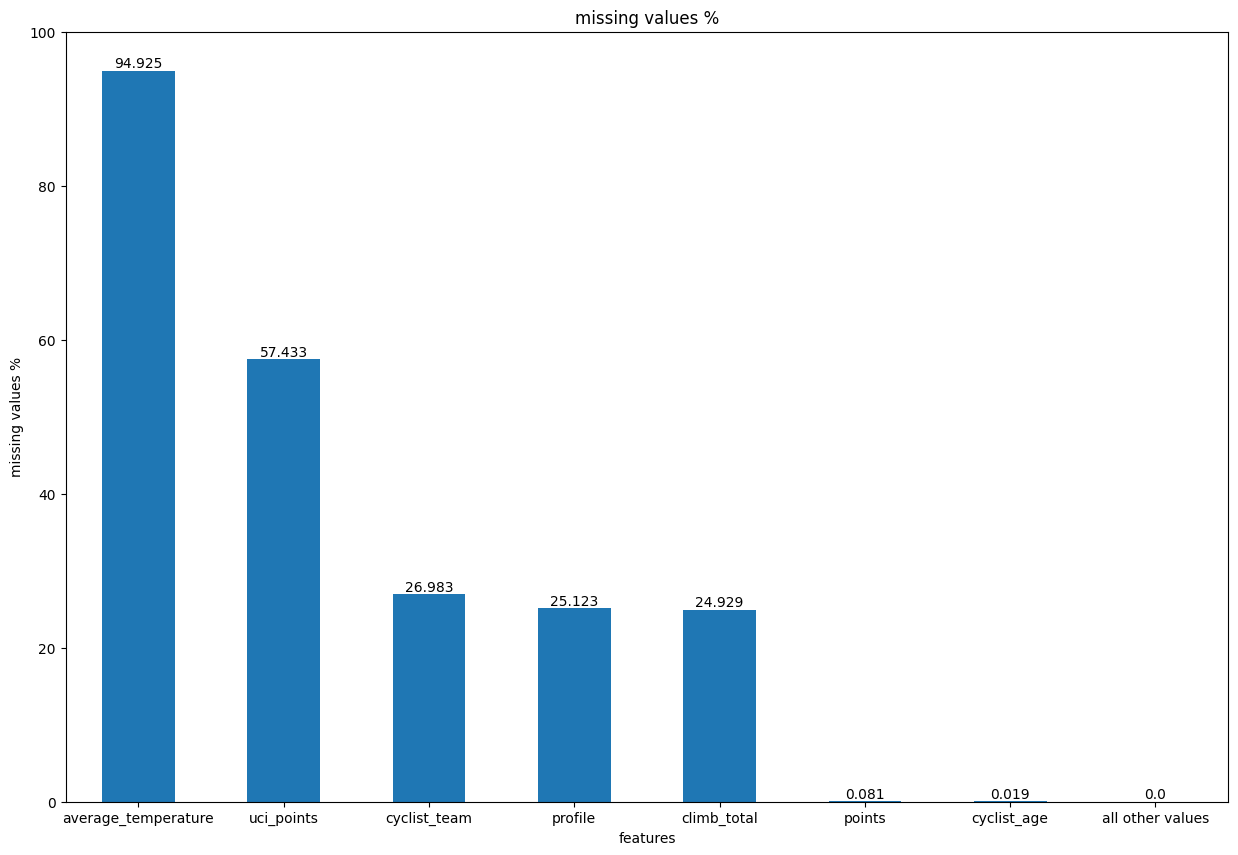

In [187]:
utils.plot_missing_values_barplot(mv_df)

# single features in-domain analysis

We can start with the analysis of the first two values: `_url` and `name`.

The first attribute is redundant and contains duplicate information with no wrong or missing values w.r.t. to its duplicates, below we can see that the name of the race is correct and same goes for the year for each entry in the dataset.

In [46]:
url_df=races_df['_url'].str.split('/',expand=True)
url_df.rename(columns={0:'name',1:'year',2:'stage'},inplace=True)
url_df['original_name']=races_df['name']
url_df['original_year']=races_df['date'].dt.year
print(len(url_df[url_df['original_name']==url_df['name']]))
print(len(url_df[url_df['original_year']==url_df['year']]))

0
0


This part analysis for all numerical values whether their non missing values are within their domain.

In [128]:
points=races_df['points'].dropna()
print('values lower than 0:',len(points[points<0]))

values lower than 0: 0


In [129]:
uci_points=races_df['uci_points'].dropna()
print('values lower than 0:',len(uci_points[uci_points<0]))

values lower than 0: 0


In [130]:
length=races_df['length'].dropna()
print('values lower than 0:',len(length[length<0]))

values lower than 0: 0


In [132]:
climb_total=races_df['climb_total'].dropna()
print('values lower than 0:',len(climb_total[climb_total<0]))

values lower than 0: 0


In [134]:
startlist_quality=races_df['startlist_quality'].dropna()
print('values lower than 0:',len(startlist_quality[startlist_quality<0]))

values lower than 0: 0


In [135]:
average_temperature=races_df['average_temperature'].dropna()
print('values lower than 0:',len(races_df[races_df['average_temperature']<0]))

values lower than 0: 0


In [138]:
position=races_df['position'].dropna()
print('values lower than 0:',len(position[position<0]))

values lower than 0: 0


In [ ]:
cyclist=races_df['cyclist'].dropna()

In [139]:
cyclist_age=races_df['cyclist_age'].dropna()
print('values lower than 0:',len(cyclist_age[cyclist_age<0]))

values lower than 0: 0


In [140]:
delta=races_df['delta'].dropna()
print('values lower than 0:',len(delta[delta<0]))

values lower than 0: 86


From these we can infer that al numerical values have correct values within range except for delta which has some values that are not.

We can continue with other kind of attributes, first the dates.

In [136]:
dates=races_df['date'].dropna()
print(dates.min(),dates.max())

1970-02-28 04:52:00 2023-07-29 05:52:14


The dates are all within range.

We can now analise the profile for the races which is coded as integers in the range \[1,2,3,4,5\].

In [133]:
profile=races_df['profile'].dropna()
# values are coded with integers from 1 to 5
domain_values=[1,2,3,4,5]
print('out of range values :',len(profile[~profile.isin(domain_values)]))

out of range values 0


Also here we don't have any range issues.